# LLM - Replicating paper Dynamics of affective states during complex learning-

    - Dataset: [LLM_Based_Math_Tutoring](https://github.com/Khan/tutoring-accuracy-dataset/blob/main/LLM_Based_Math_Tutoring.pdf)
    - Paper: [Dynamics of affective states during complex learning](https://doi.org/10.1016/j.learninstruc.2011.10.001)


## Import libraries


In [12]:
import numpy as np
import pandas as pd
import networkx as nx
import researchpy as rp
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [13]:
DATA_DIR = "data/output"  # "/content/drive/MyDrive/Affective States/output/" # to update where run on colab
STATES = [
    "boredom",
    "engagement",
    "confusion",
    "frustration",
    "delight",
    "surprise",
    "neutral",
]

## Analysis


In [143]:
# print(df_result11[['prompt', 'llm_response']].head(1).to_string())
# df_result11[['prompt', 'llm_response']].iloc[0]
# DATA3 = pd.read_json("data/CoMTA_dataset3.json")
# DATA3.head(20)

In [ ]:
#  Load llm responses of experiments 1, 2 and 3
# Model 1
df_result11 = pd.read_csv(f"{DATA_DIR}/experiment_1_model1.csv", delimiter=",")  # Done
df_result21 = pd.read_csv(f"{DATA_DIR}/experiment_2_model1.csv", delimiter=",")
df_result31 = pd.read_csv(f"{DATA_DIR}/experiment_3_model1.csv", delimiter=",")

# # Model 2
# df_result12 = pd.read_csv(f'{DATA_DIR}/experiment_1_model2.csv', delimiter=",")
# df_result22 = pd.read_csv(f'{DATA_DIR}/experiment_2_model2.csv', delimiter=",")
# df_result32 = pd.read_csv(f'{DATA_DIR}/experiment_3_model2.csv', delimiter=",")

In [41]:
def clean_data(df, cols):
    for i in cols:
        if i in df.columns:
            df[i] = df[i].str.lower()
        else:
            print(f"Column '{i}' not found in the DataFrame.")
    return df


def compute_mean_sd(df, cols):
    data = pd.get_dummies(df, columns=cols, prefix=["state"], dtype=int)
    numeric = data.select_dtypes(include=np.number)
    result = numeric.agg(["sum", "mean", "std"]).T
    return result

In [31]:
pd.unique(df_result11["current_state"])

array(['delight', 'engagement', 'confusion', 'frustration', 'surprise',
       'boredom', 'neutral'], dtype=object)

In [32]:
DFS = {
    "Experiment 1 Model 1": df_result11,
    # 'Experiment 1 Model 2': df_result12,
    "Experiment 2 Model 1": df_result21,
    # 'Experiment 2 Model 2': df_result22,
    "Experiment 3 Model 1": df_result31,
    # 'Experiment 3 Model 2': df_result32
}

cols = ["previous_state", "current_state", "next_state"]
for name, df in DFS.items():
    clean_data(df, df[cols])

In [43]:
for name, df in DFS.items():
    duplicate = df["current_state"] == df["next_state"]
    df_state = df.groupby("current_state")["student_id"].agg(["mean", "std"])
    print(f"DataFrame name: {name}\n{"-" * 70}")
    print(
        f"Shape: {df.shape}\nOn average there were {round(len(df)/df['student_id'].nunique(), 0)}"
        f" total judgment for each student (SD={round(df['student_id'].std(), 0)})\n"
        f"Count of self-transitions: {df[~duplicate].shape[0]}\n"
        f"{df_state.round(3)}\n"
    )

DataFrame name: Experiment 1 Model 1
----------------------------------------------------------------------
Shape: (917, 12)
On average there were 5.0 total judgment for each student (SD=57.0)
Count of self-transitions: 453
                  mean     std
current_state                 
boredom        107.944  52.281
confusion       98.025  57.730
delight         75.973  62.057
engagement      93.510  55.593
frustration    107.380  53.562
neutral        100.618  54.065
surprise        75.294  57.640

DataFrame name: Experiment 2 Model 1
----------------------------------------------------------------------
Shape: (917, 12)
On average there were 5.0 total judgment for each student (SD=57.0)
Count of self-transitions: 229
                  mean     std
current_state                 
boredom        102.583  45.361
confusion       94.268  56.611
delight         85.559  57.776
engagement      93.632  56.384
frustration    111.979  62.109
neutral         90.595  56.797
surprise        78.784  

In [44]:
for name, df in DFS.items():
    print(f"{name}\n{df.describe().T}\n")

Experiment 1 Model 1
                    count       mean        std  min   25%   50%    75%    max
student_id          917.0  93.514722  56.674115  1.0  43.0  94.0  140.0  188.0
time_step           917.0   4.448201   3.623792  1.0   2.0   3.0    6.0   21.0
skill_level           0.0        NaN        NaN  NaN   NaN   NaN    NaN    NaN
math_anxiety_level    0.0        NaN        NaN  NaN   NaN   NaN    NaN    NaN

Experiment 2 Model 1
                    count       mean        std  min   25%   50%    75%    max
student_id          917.0  93.514722  56.674115  1.0  43.0  94.0  140.0  188.0
time_step           917.0   4.448201   3.623792  1.0   2.0   3.0    6.0   21.0
skill_level           0.0        NaN        NaN  NaN   NaN   NaN    NaN    NaN
math_anxiety_level    0.0        NaN        NaN  NaN   NaN   NaN    NaN    NaN

Experiment 3 Model 1
                    count       mean        std  min   25%   50%    75%    max
student_id          917.0  93.514722  56.674115  1.0  43.0  94.0  

In [53]:
for name, df in DFS.items():
    summary = rp.summary_cont(df.groupby("next_state")["student_id"])
    print(
        f"Statistic Summary of {name}\n{50 * '-'}\n"
        # "{summary}\n"
        f"{compute_mean_sd(df, ['next_state'])}"
    )



Statistic Summary of Experiment 1 Model 1
--------------------------------------------------
                        sum       mean        std
student_id          85753.0  93.514722  56.674115
time_step            4079.0   4.448201   3.623792
skill_level             0.0        NaN        NaN
math_anxiety_level      0.0        NaN        NaN
state_confusion       159.0   0.173391   0.378792
state_delight          52.0   0.056707   0.231407
state_engagement      666.0   0.726281   0.446110
state_frustration      37.0   0.040349   0.196884
state_neutral           3.0   0.003272   0.057135


Statistic Summary of Experiment 2 Model 1
--------------------------------------------------
                        sum       mean        std
student_id          85753.0  93.514722  56.674115
time_step            4079.0   4.448201   3.623792
skill_level             0.0        NaN        NaN
math_anxiety_level      0.0        NaN        NaN
state_confusion        18.0   0.019629   0.138798
state_deli

In [56]:
# transition_count = df_model1.groupby(['current_state', 'next_state'])['student_id'].nunique().reset_index(name="N")
transition = df_result31.loc[:, ("current_state", "next_state")]
transition["transition_name"] = (
    transition["current_state"].astype(str)
    + " --> "
    + transition["next_state"].astype(str)
)

transition
# data = pd.get_dummies(transition_count, columns = ['transition_name'], prefix=['state'], dtype=int)
compute_mean_sd(transition, ["transition_name"])

,sum,mean,std
state_boredom --> confusion,2.0,0.002181,0.046676
state_boredom --> engagement,28.0,0.030534,0.172146
state_confusion --> confusion,49.0,0.053435,0.225022
state_confusion --> engagement,55.0,0.059978,0.237576
state_confusion --> frustration,11.0,0.011996,0.108925
state_delight --> confusion,1.0,0.001091,0.033023
state_delight --> delight,42.0,0.045802,0.209168
state_delight --> engagement,32.0,0.034896,0.183618
state_engagement --> confusion,52.0,0.056707,0.231407
state_engagement --> delight,15.0,0.016358,0.126916


In [57]:
transition_count = df_result31[["current_state", "next_state"]].copy()
transition_count["transition_name"] = (
    transition_count["current_state"].astype(str)
    + " --> "
    + transition_count["next_state"].astype(str)
)
# transition_count
result = compute_mean_sd(transition_count, ["transition_name"])
result.columns = ["N", "M", "SD"]

result["t"] = result.apply(
    lambda row: row["M"] / (row["SD"] / np.sqrt(row["N"])) if row["SD"] > 0 else 0,
    axis=1,
)
result["df"] = result["N"].apply(lambda x: x - 1 if x > 1 else 0)  # N - 1
result["p"] = result.apply(
    lambda row: stats.t.sf(abs(row["t"]), row["df"]) * 2 if row["df"] > 0 else 1, axis=1
)
result["d"] = result.apply(
    lambda row: row["M"] / row["SD"] if row["SD"] > 0 else 0, axis=1
)

result[["N", "df"]] = result[["N", "df"]].astype(int)
result.round(3)

,N,M,SD,t,df,p,d
state_boredom --> confusion,2,0.002,0.047,0.066,1,0.958,0.047
state_boredom --> engagement,28,0.031,0.172,0.939,27,0.356,0.177
state_confusion --> confusion,49,0.053,0.225,1.662,48,0.103,0.237
state_confusion --> engagement,55,0.060,0.238,1.872,54,0.067,0.252
state_confusion --> frustration,11,0.012,0.109,0.365,10,0.723,0.110
state_delight --> confusion,1,0.001,0.033,0.033,0,1.000,0.033
state_delight --> delight,42,0.046,0.209,1.419,41,0.163,0.219
state_delight --> engagement,32,0.035,0.184,1.075,31,0.291,0.190
state_engagement --> confusion,52,0.057,0.231,1.767,51,0.083,0.245
state_engagement --> delight,15,0.016,0.127,0.499,14,0.625,0.129


## Data Visualization


In [75]:
def plot_series(df, t, x_label, idx=0):
    palette = list(sns.palettes.mpl_palette("Dark2"))
    xs = df[t]
    ys = df["count"]

    plt.plot(xs, ys, label=x_label, color=palette[idx % len(palette)])


def matrix(df, idx, cols, vals):
    matrix = df.pivot(
        index=idx,
        columns=cols,
        values=vals,
    ).fillna("-")
    # print(khan_matrix_prob)
    # print("\n")
    return pd.DataFrame(matrix)


def transition_visualization(df, x, y, category):
    plt.figure(figsize=(12, 6))
    sns.lineplot(x=x, y=y, hue=category, data=df, palette="tab10")

    # customize the plot
    plt.title("Student Emotional Trajectory")
    plt.xlabel("Time_steps")
    plt.ylabel("Students")
    # plt.xticks(rotation=90)
    plt.legend(title=category)
    plt.grid(True)
    return plt.show()


def heatmap(df, x_label: str, y_label: str):
    plt.figure(figsize=(6, 4))
    sns.heatmap(df, annot=True, cmap="Reds", fmt=".2f", linewidths=0.5)
    # Labels and formatting
    plt.title("Transition Matrix")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    return plt.show()


def network_graph(data, ps, ns, prob):

    states = set(data[ps]).union(set(data[ns]))

    G = nx.MultiDiGraph()
    G.add_nodes_from(states)

    for i, row in data.iterrows():
        G.add_edge(
            row[ps],
            row[ns],
            key=i,
            prob=row[prob],
        )

    # pos = nx.spring_layout(G, seed=14) circular
    pos = nx.circular_layout(G, scale=1)

    # Plot the graph
    plt.figure(figsize=(8, 6))

    nx.draw_networkx_nodes(G, pos, node_color="orange", node_size=1250)
    nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")

    for u, v, key, edge_data in G.edges(keys=True, data=True):
        nx.draw_networkx_edges(
            G,
            pos,
            edgelist=[(u, v)],
            edge_color=sns.color_palette("Dark2"),
            connectionstyle=f"arc3, rad=0.15",  # curvature for distinct edges
            width=2,
            arrowstyle="-|>",
            arrows=True,
            arrowsize=15,
            min_target_margin=15,
        )

    # Add edge labels (probabilities)
    edge_labels = {
        (u, v, key): f"({edge_data['prob'] * 100:.1f}%)"
        for u, v, key, edge_data in G.edges(keys=True, data=True)
    }
    nx.draw_networkx_edge_labels(
        G, pos, edge_labels=edge_labels, font_size=8, font_color="black", label_pos=0.8
    )

    # debugging: print edges
    print("All edges (with attributes):", list(G.edges(keys=True, data=True)))

    plt.title(f"State Transition Graph")
    plt.show()

In [77]:
def comp_model(df1, df2, t, ns):
    count1 = df1.groupby([t, ns]).size().reset_index(name="count")
    count2 = df2.groupby([t, ns]).size().reset_index(name="count")

    all = count1.merge(count2, on=[t, ns], suffixes=("_exper1", "_exper2"))
    fig, ax = plt.subplots(figsize=(10, 6))

    bar_width = 0.2
    x_positions = np.arange(len(all[t].unique()))

    colors = sns.color_palette("Dark2", n_colors=len(all[ns].unique()))

    for i, (series_name, series) in enumerate(all.groupby(ns)):
        x = np.arange(len(series))  # X positions

        ax.bar(
            x + (i * bar_width),
            series["count_exper1"],
            width=bar_width,
            label=f"{series_name} - Model 1",
            alpha=0.7,
            color=colors[i],
        )
        ax.bar(
            x + (i * bar_width),
            series["count_exper2"],
            width=bar_width,
            label=f"{series_name} - Model 2",
            alpha=0.3,
            color=colors[i],
        )

    ax.set_xlabel("Time-step")
    ax.set_ylabel("Total students")
    ax.set_title(f"Comparison of two models")

    ax.set_xticks(x_positions)
    ax.set_xticklabels(all[t].unique(), rotation=45)

    ax.legend(title="Next State", bbox_to_anchor=(1, 1), loc="upper left")

    plt.tight_layout()
    plt.show()

In [65]:
df_result31.columns

Index(['student_id', 'time_step', 'student_response', 'tutor_response',
       'previous_state', 'current_state', 'next_state', 'math_level',
       'skill_level', 'math_anxiety_level', 'prompt', 'llm_response'],
      dtype='object')

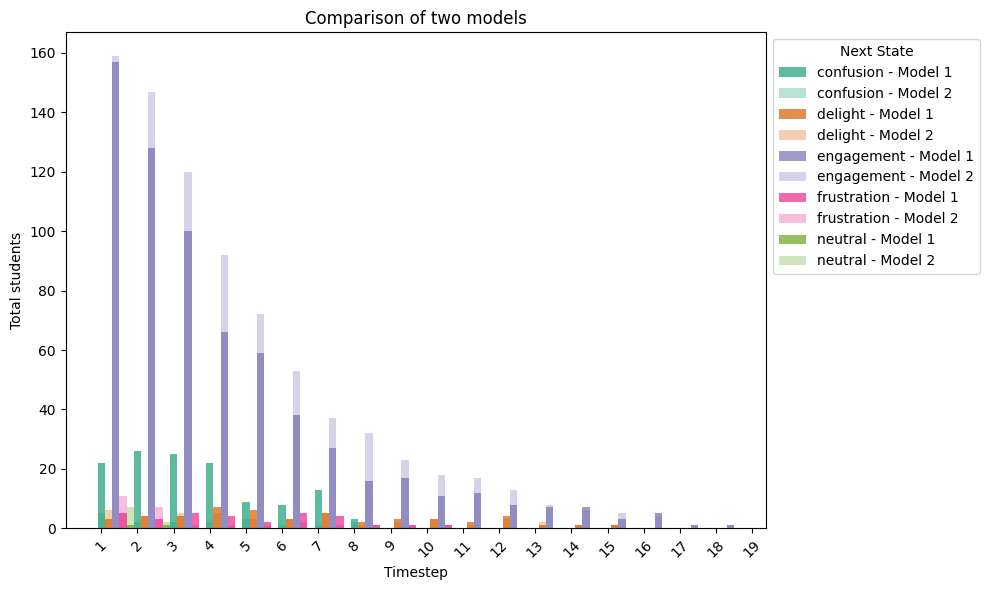

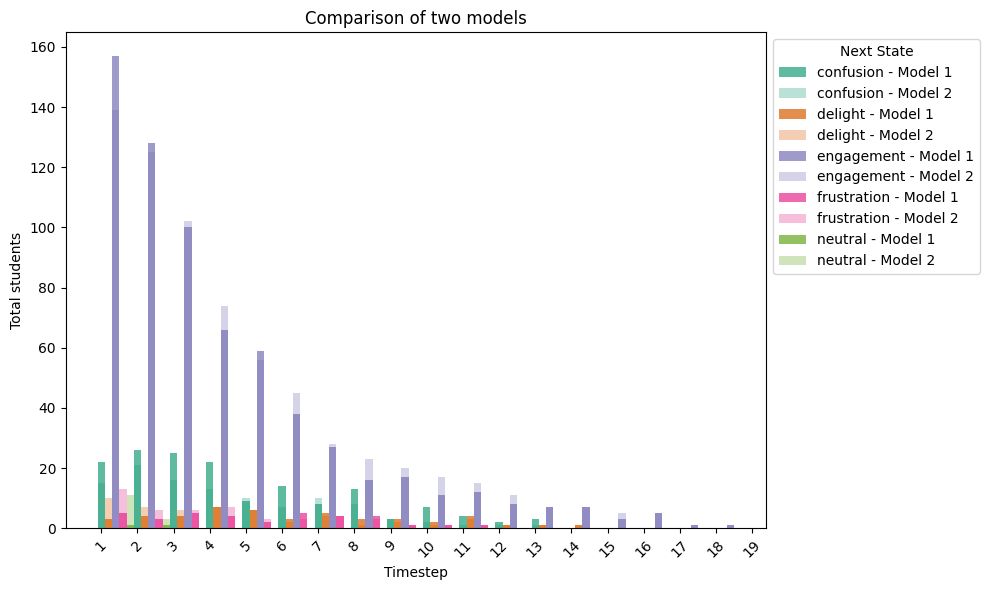

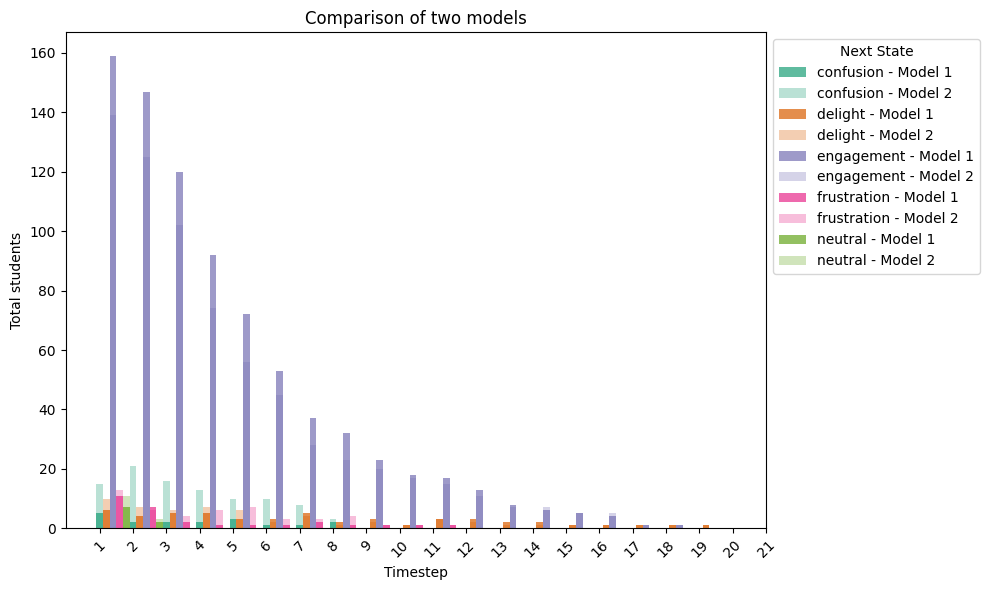

In [72]:
comp_model(df_result11, df_result21, "time_step", "next_state")
comp_model(df_result11, df_result31, "time_step", "next_state")
comp_model(df_result21, df_result31, "time_step", "next_state")

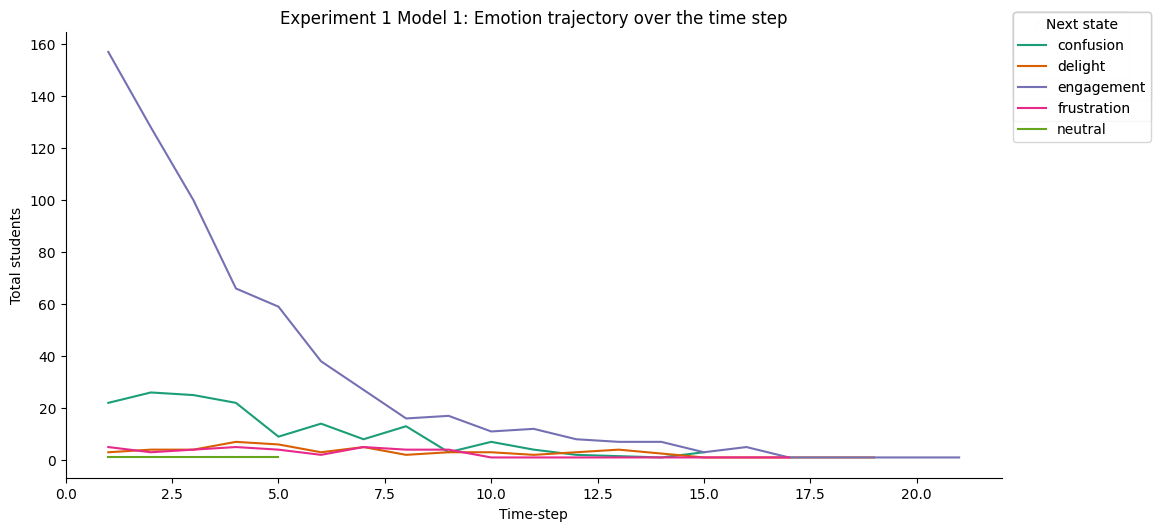

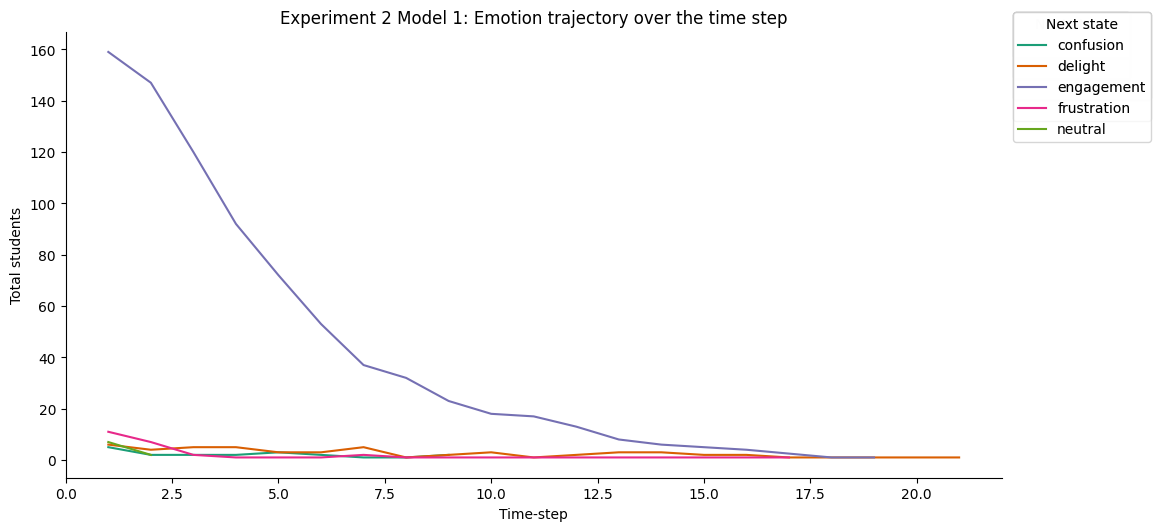

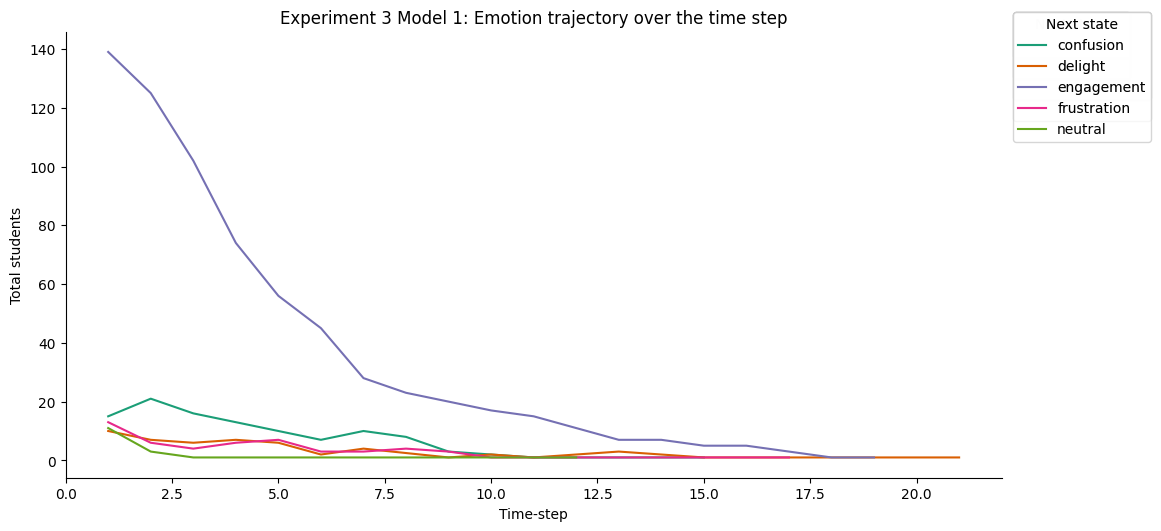

In [80]:
for name, df in DFS.items():
    count = df.groupby(["time_step", "next_state"]).size().reset_index(name="count")
    fig, ax = plt.subplots(figsize=(10, 5.2), layout="constrained")
    df_sorted = count.sort_values("time_step", ascending=True)
    for i, (series_name, series) in enumerate(df_sorted.groupby("next_state")):
        plot_series(series, "time_step", series_name, i)
        fig.legend(title="Next state", bbox_to_anchor=(1, 1), loc="upper left")
    sns.despine(fig=fig, ax=ax)
    plt.title(f"{name}: Emotion trajectory over the time step")
    plt.xlabel("Time-step")
    plt.ylabel("Total students")

In [83]:
matrix(df_result11, "student_id", "time_step", "next_state")
# matrix(df_result21, 'student_id', 'time_step', 'next_state')
# matrix(df_result31, 'student_id', 'time_step', 'next_state')

time_step,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
student_id,,,,,,,,,,,,,,,,,,,,,
1,engagement,confusion,engagement,engagement,confusion,engagement,frustration,delight,engagement,engagement,...,-,-,-,-,-,-,-,-,-,-
2,engagement,engagement,engagement,engagement,engagement,engagement,delight,delight,delight,delight,...,delight,delight,engagement,-,-,-,-,-,-,-
3,confusion,engagement,engagement,engagement,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
4,engagement,engagement,engagement,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
5,engagement,engagement,engagement,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,confusion,-,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
185,confusion,confusion,engagement,confusion,engagement,engagement,frustration,frustration,engagement,-,...,-,-,-,-,-,-,-,-,-,-
186,confusion,engagement,engagement,frustration,confusion,frustration,engagement,confusion,engagement,engagement,...,confusion,engagement,engagement,-,-,-,-,-,-,-


Experiment 1 Model 1



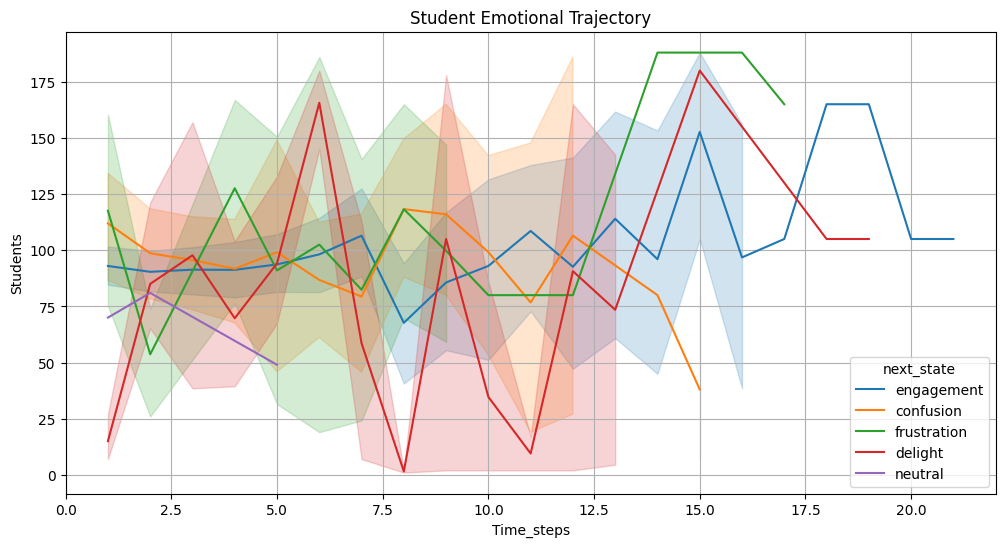

Experiment 2 Model 1



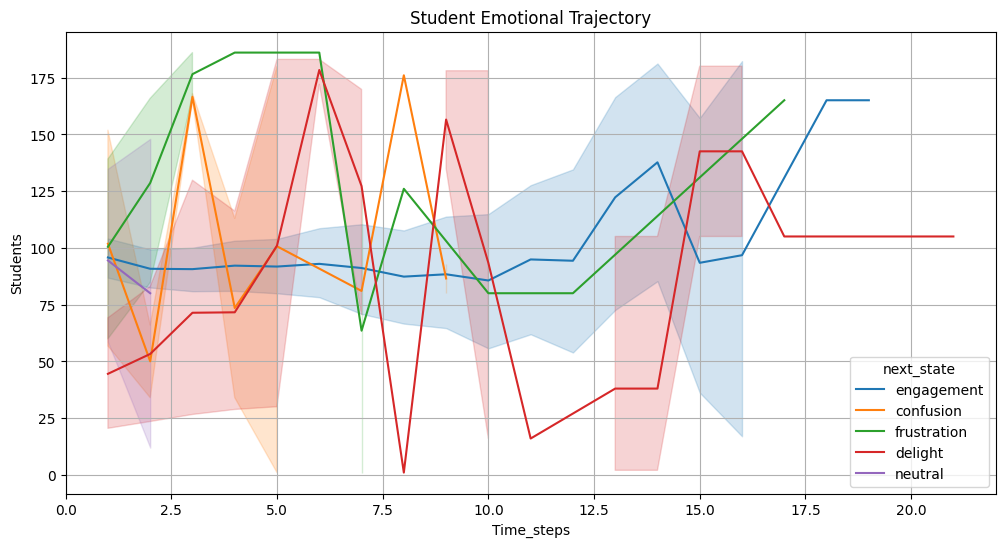

Experiment 3 Model 1



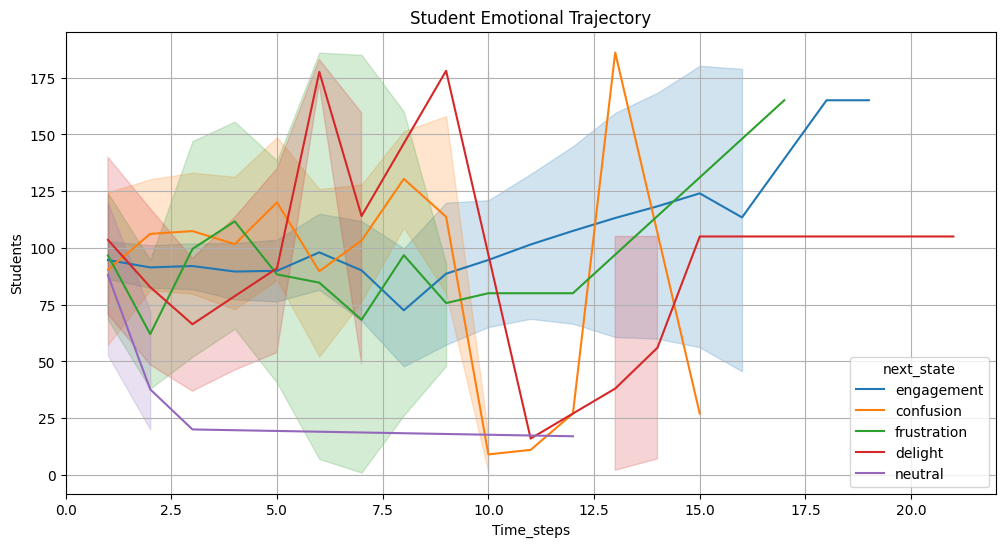

In [85]:
for name, df in DFS.items():
    print(f"{name}\n")
    transition_visualization(df, "time_step", "student_id", "next_state")

## Compute probability and likelihood

D'Mello - Study 1 [ total instances 1796 ]
28 participants

(M = .160, SD = .140),
confusion (M = .180, SD = .127),
engagement/flow (M = .199, SD = .161),
frustration (M = .114, SD = .107), and
neutral (M = .288, SD = .248) were on par and significantly greater than
delight (M = .032, SD = .038) and
surprise (M = .027, SD = .028), which were equivalent to each other

- N - the number of unique students transiting from previous state to next state
- M - Mean probability
- SD - Standard Deviation per previous state
- t - t-statistic tests whether transition probabilities are significantly different from zero
- df - adjusts based on the sample size
- p - p-value computes the significance of the transition probability
- d - Cohen’s d for standardizing effect size


In [103]:
def compute_probability(df, ps, ns, exclude_self_transition=False):
    """
    Compute the probability of transitioning from a previous state to a next state.

    Args:
        - df (pd.DataFrame): DataFrame containing state transitions.
        - ps (str): Column name for the previous state.
        - ns(str): Column name for the next state.
        - exclude_self_transition (bool): If True, rows where p_state equals n_state are excluded.

    Returns:
        pd.DataFrame: DataFrame containing:
            - ps: previous state,
            - ns: next state,
            - transition_count: number of transitions from p_state to n_state,
            - previous_state_count: total number of occurrences of p_state,
            - probability: transition_count divided by previous_state_count.
            - next_state_count: total number of occurrences of n_state,
            - likelihood: next_state_count divided by total number of student interactions
    """
    # Remove rows with missing previous state.
    # df = df[df[ps].notna()]

    # Exclude self-transitions if required.
    if exclude_self_transition:
        df = df[df[ps] != df[ns]]

    # Compute counts for each transition and for each previous state.
    transition_count = df.groupby([ps, ns]).size().reset_index(name="transition_count")
    previous_state_count = (
        df.groupby(ps).size().reset_index(name="previous_state_count")
    )

    next_state_count = df.groupby(ns).size().reset_index(name="next_state_count")

    # Merge and calculate transition probabilities.
    result = transition_count.merge(previous_state_count, on=ps, how="left")
    result["probability"] = result["transition_count"] / result["previous_state_count"]

    # Merge and calculate transition likelihood.
    result = result.merge(next_state_count, on=ns, how="left")
    result["likelihood"] = result["transition_count"] / df["student_id"].count()

    return result


def compute_transition_statistics(df, ps, ns, exclude_self_transition=False):

    # Exclude self-transitions if required.
    if exclude_self_transition:
        df = df[df[ps] != df[ns]]

    data = df[[ps, ns]].copy()
    data["transition_name"] = data[ps].astype(str) + " --> " + data[ns].astype(str)
    # transition_count
    result = compute_mean_sd(data, ["transition_name"])
    result.columns = ["N", "M", "SD"]

    # result['t'] = result.apply(lambda row: row['M'] / (row['SD'] / np.sqrt(row['N'])) if row['SD'] > 0 else 0, axis=1)
    # result['df'] = result['N'].apply(lambda x: x - 1 if x > 1 else 0) # N - 1
    # result['p'] = result.apply(lambda row: stats.t.sf(abs(row['t']), row['df']) * 2 if row['df'] > 0 else 1, axis=1)
    # result['d'] = result.apply(lambda row: row['M'] / row['SD'] if row['SD'] > 0 else 0, axis=1)

    result["t"] = result["M"] / (result["SD"] / np.sqrt(result["N"]))
    result["df"] = result["N"] - 1
    result["p"] = 2 * (1 - stats.t.cdf(np.abs(result["t"]), result["df"]))
    result["d"] = result["M"] / result["SD"]

    result[["N", "df"]] = result[["N", "df"]].astype(int)

    return result

In [104]:
# compute_transition_statistics(df_result31, 'current_state', 'next_state', exclude_self_transition=True)

In [105]:
prob_result11 = compute_probability(
    df_result11, "current_state", "next_state", exclude_self_transition=True
)
prob_result21 = compute_probability(
    df_result21, "current_state", "next_state", exclude_self_transition=True
)
prob_result31 = compute_probability(
    df_result31, "current_state", "next_state", exclude_self_transition=True
)

### Model 1

Self transition = True


----------------------------------------------------------------------
Transition probability of experiment 1 Model 1
----------------------------------------------------------------------
next_state     confusion   delight  engagement  frustration   neutral
current_state                                                        
boredom         0.111111  0.055556    0.777778     0.000000  0.055556
confusion       0.000000  0.034483    0.887931     0.077586  0.000000
delight         0.111111  0.000000    0.873016     0.000000  0.015873
engagement      0.615385  0.230769    0.000000     0.146853  0.006993
frustration     0.266667  0.066667    0.666667     0.000000  0.000000
neutral         0.147059  0.000000    0.794118     0.058824  0.000000
surprise        0.117647  0.029412    0.852941     0.000000  0.000000



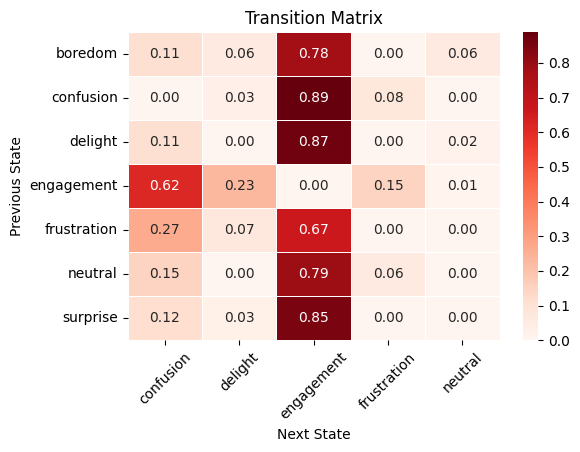

----------------------------------------------------------------------
Transition probability of experiment 2 Model 1
----------------------------------------------------------------------
next_state     confusion   delight  engagement  frustration   neutral
current_state                                                        
boredom         0.000000  0.000000    1.000000     0.000000  0.000000
confusion       0.000000  0.027778    0.833333     0.138889  0.000000
delight         0.000000  0.000000    1.000000     0.000000  0.000000
engagement      0.324324  0.540541    0.000000     0.135135  0.000000
frustration     0.035714  0.035714    0.892857     0.000000  0.035714
neutral         0.000000  0.000000    1.000000     0.000000  0.000000
surprise        0.000000  0.027027    0.972973     0.000000  0.000000



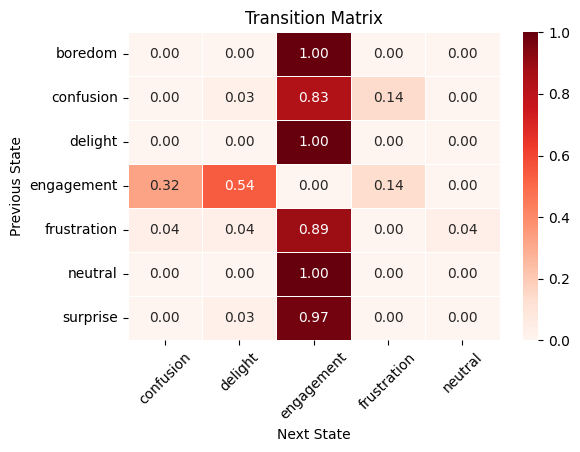

----------------------------------------------------------------------
Transition probability of experiment 3 Model 1
----------------------------------------------------------------------
next_state     confusion   delight  engagement  frustration   neutral
current_state                                                        
boredom         0.066667  0.000000    0.933333     0.000000  0.000000
confusion       0.000000  0.000000    0.833333     0.166667  0.000000
delight         0.030303  0.000000    0.969697     0.000000  0.000000
engagement      0.641975  0.185185    0.000000     0.160494  0.012346
frustration     0.000000  0.032258    0.967742     0.000000  0.000000
neutral         0.052632  0.000000    0.947368     0.000000  0.000000
surprise        0.137931  0.000000    0.862069     0.000000  0.000000



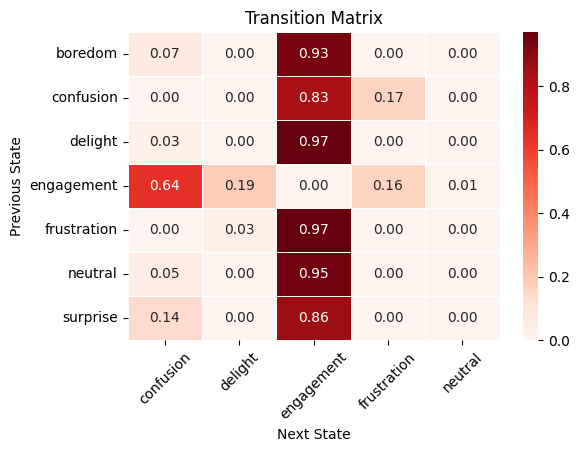

In [109]:
DFS_PROB_SELF_TRUE = {
    "Transition probability of experiment 1 Model 1": prob_result11,
    #'Transition probability of experiment 1 Model 2': prob_result11,
    "Transition probability of experiment 2 Model 1": prob_result21,
    #'Transition probability of experiment 2 Model 2': df_result22,
    "Transition probability of experiment 3 Model 1": prob_result31,
    #'Transition probability of experiment 3 Model 2': df_result32
}


def show_prob(dfs):
    for name, df in dfs.items():
        matrix_prob = df.pivot(
            index="current_state", columns="next_state", values="probability"
        ).fillna(0)
        print(f"{70*'-'}\n{name}\n{70*'-'}\n{matrix_prob}\n")
        heatmap(matrix_prob, "Next State", "Previous State")


show_prob(DFS_PROB_SELF_TRUE)

### Model 2

Self_transition = False


----------------------------------------------------------------------
Transition probability of experiment 1 Model 1
----------------------------------------------------------------------
next_state     confusion   delight  engagement  frustration   neutral
current_state                                                        
boredom         0.111111  0.055556    0.777778     0.000000  0.055556
confusion       0.261146  0.025478    0.656051     0.057325  0.000000
delight         0.095890  0.136986    0.753425     0.000000  0.013699
engagement      0.159710  0.059891    0.740472     0.038113  0.001815
frustration     0.240000  0.060000    0.600000     0.100000  0.000000
neutral         0.147059  0.000000    0.794118     0.058824  0.000000
surprise        0.117647  0.029412    0.852941     0.000000  0.000000



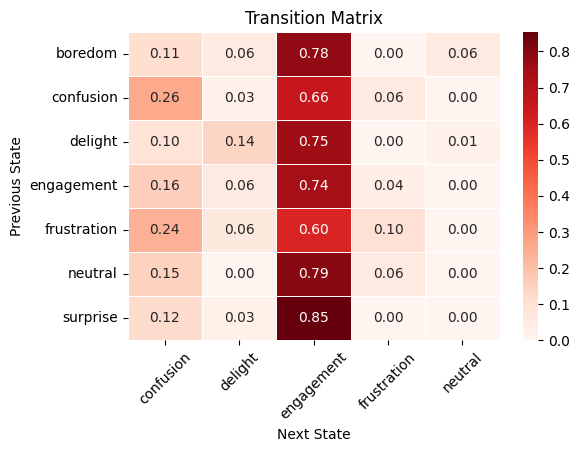

----------------------------------------------------------------------
Transition probability of experiment 2 Model 1
----------------------------------------------------------------------
next_state     confusion   delight  engagement  frustration   neutral
current_state                                                        
boredom         0.000000  0.000000    1.000000     0.000000  0.000000
confusion       0.121951  0.024390    0.731707     0.121951  0.000000
delight         0.000000  0.441176    0.558824     0.000000  0.000000
engagement      0.018100  0.030166    0.944193     0.007541  0.000000
frustration     0.021277  0.021277    0.531915     0.404255  0.021277
neutral         0.000000  0.000000    0.783784     0.000000  0.216216
surprise        0.000000  0.027027    0.972973     0.000000  0.000000



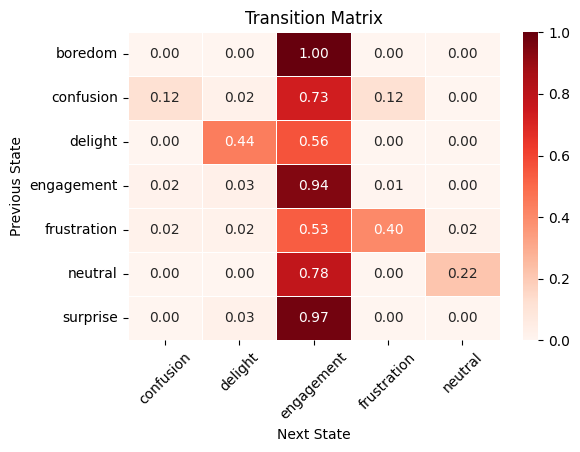

----------------------------------------------------------------------
Transition probability of experiment 3 Model 1
----------------------------------------------------------------------
next_state     confusion   delight  engagement  frustration   neutral
current_state                                                        
boredom         0.066667  0.000000    0.933333     0.000000  0.000000
confusion       0.426087  0.000000    0.478261     0.095652  0.000000
delight         0.013333  0.560000    0.426667     0.000000  0.000000
engagement      0.090592  0.026132    0.858885     0.022648  0.001742
frustration     0.000000  0.016667    0.500000     0.483333  0.000000
neutral         0.029412  0.000000    0.529412     0.000000  0.441176
surprise        0.137931  0.000000    0.862069     0.000000  0.000000



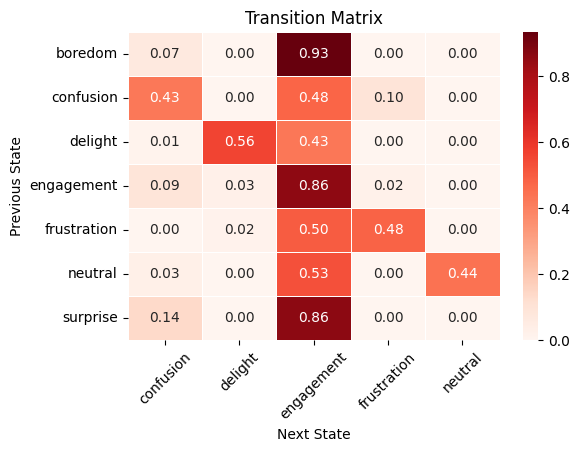

In [110]:
prob_result11_false = compute_probability(
    df_result11, "current_state", "next_state", exclude_self_transition=False
)
prob_result21_false = compute_probability(
    df_result21, "current_state", "next_state", exclude_self_transition=False
)
prob_result31_false = compute_probability(
    df_result31, "current_state", "next_state", exclude_self_transition=False
)

DFS_PROB_SELF_FALSE = {
    "Transition probability of experiment 1 Model 1": prob_result11_false,
    #'Transition probability of experiment 1 Model 2': prob_result11_false,
    "Transition probability of experiment 2 Model 1": prob_result21_false,
    #'Transition probability of experiment 2 Model 2': df_result22_false,
    "Transition probability of experiment 3 Model 1": prob_result31_false,
    #'Transition probability of experiment 3 Model 2': df_result32_false
}

show_prob(DFS_PROB_SELF_FALSE)

All edges (with attributes): [('neutral', 'confusion', 17, {'prob': 0.14705882352941177}), ('neutral', 'engagement', 18, {'prob': 0.7941176470588235}), ('neutral', 'frustration', 19, {'prob': 0.058823529411764705}), ('surprise', 'confusion', 20, {'prob': 0.11764705882352941}), ('surprise', 'delight', 21, {'prob': 0.029411764705882353}), ('surprise', 'engagement', 22, {'prob': 0.8529411764705882}), ('boredom', 'confusion', 0, {'prob': 0.1111111111111111}), ('boredom', 'delight', 1, {'prob': 0.05555555555555555}), ('boredom', 'engagement', 2, {'prob': 0.7777777777777778}), ('boredom', 'neutral', 3, {'prob': 0.05555555555555555}), ('frustration', 'confusion', 14, {'prob': 0.26666666666666666}), ('frustration', 'delight', 15, {'prob': 0.06666666666666667}), ('frustration', 'engagement', 16, {'prob': 0.6666666666666666}), ('engagement', 'confusion', 10, {'prob': 0.6153846153846154}), ('engagement', 'delight', 11, {'prob': 0.23076923076923078}), ('engagement', 'frustration', 12, {'prob': 0.1

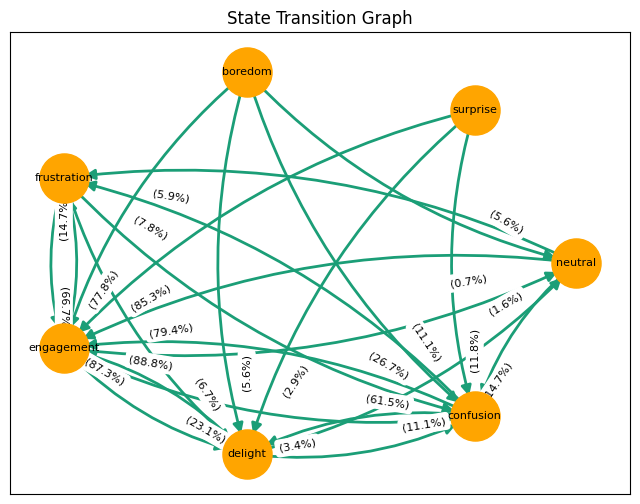

All edges (with attributes): [('neutral', 'engagement', 12, {'prob': 1.0}), ('surprise', 'delight', 13, {'prob': 0.02702702702702703}), ('surprise', 'engagement', 14, {'prob': 0.972972972972973}), ('boredom', 'engagement', 0, {'prob': 1.0}), ('frustration', 'confusion', 8, {'prob': 0.03571428571428571}), ('frustration', 'delight', 9, {'prob': 0.03571428571428571}), ('frustration', 'engagement', 10, {'prob': 0.8928571428571429}), ('frustration', 'neutral', 11, {'prob': 0.03571428571428571}), ('engagement', 'confusion', 5, {'prob': 0.32432432432432434}), ('engagement', 'delight', 6, {'prob': 0.5405405405405406}), ('engagement', 'frustration', 7, {'prob': 0.13513513513513514}), ('delight', 'engagement', 4, {'prob': 1.0}), ('confusion', 'delight', 1, {'prob': 0.027777777777777776}), ('confusion', 'engagement', 2, {'prob': 0.8333333333333334}), ('confusion', 'frustration', 3, {'prob': 0.1388888888888889})]


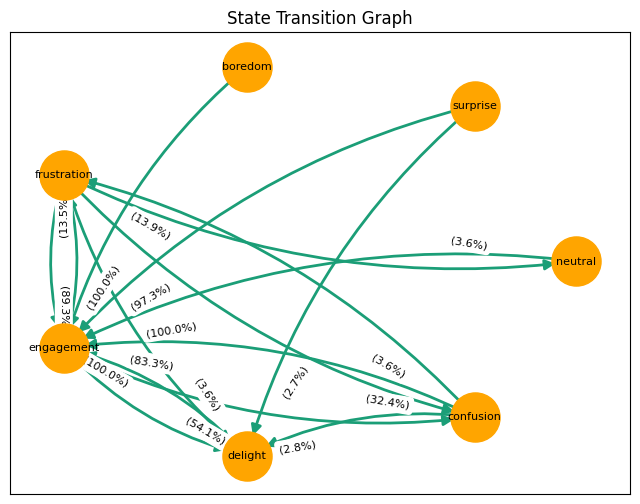

All edges (with attributes): [('neutral', 'confusion', 12, {'prob': 0.05263157894736842}), ('neutral', 'engagement', 13, {'prob': 0.9473684210526315}), ('surprise', 'confusion', 14, {'prob': 0.13793103448275862}), ('surprise', 'engagement', 15, {'prob': 0.8620689655172413}), ('boredom', 'confusion', 0, {'prob': 0.06666666666666667}), ('boredom', 'engagement', 1, {'prob': 0.9333333333333333}), ('frustration', 'delight', 10, {'prob': 0.03225806451612903}), ('frustration', 'engagement', 11, {'prob': 0.967741935483871}), ('engagement', 'confusion', 6, {'prob': 0.6419753086419753}), ('engagement', 'delight', 7, {'prob': 0.18518518518518517}), ('engagement', 'frustration', 8, {'prob': 0.16049382716049382}), ('engagement', 'neutral', 9, {'prob': 0.012345679012345678}), ('delight', 'confusion', 4, {'prob': 0.030303030303030304}), ('delight', 'engagement', 5, {'prob': 0.9696969696969697}), ('confusion', 'engagement', 2, {'prob': 0.8333333333333334}), ('confusion', 'frustration', 3, {'prob': 0.1

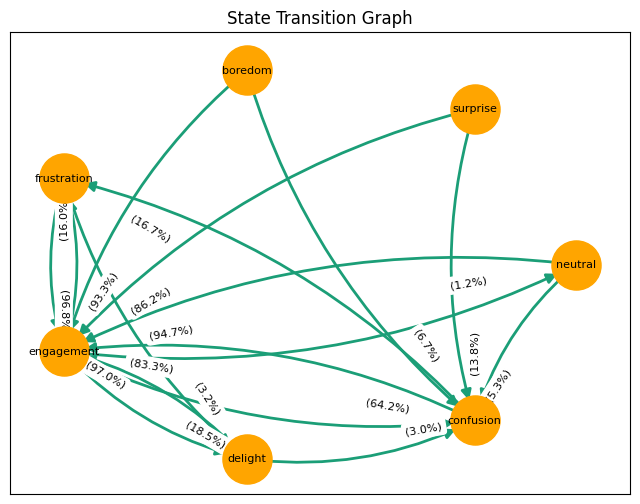

In [115]:
network_graph(prob_result11, "current_state", "next_state", "probability")
network_graph(prob_result21, "current_state", "next_state", "probability")
network_graph(prob_result31, "current_state", "next_state", "probability")

All edges (with attributes): [('neutral', 'confusion', 21, {'prob': 0.14705882352941177}), ('neutral', 'engagement', 22, {'prob': 0.7941176470588235}), ('neutral', 'frustration', 23, {'prob': 0.058823529411764705}), ('surprise', 'confusion', 24, {'prob': 0.11764705882352941}), ('surprise', 'delight', 25, {'prob': 0.029411764705882353}), ('surprise', 'engagement', 26, {'prob': 0.8529411764705882}), ('boredom', 'confusion', 0, {'prob': 0.1111111111111111}), ('boredom', 'delight', 1, {'prob': 0.05555555555555555}), ('boredom', 'engagement', 2, {'prob': 0.7777777777777778}), ('boredom', 'neutral', 3, {'prob': 0.05555555555555555}), ('frustration', 'confusion', 17, {'prob': 0.24}), ('frustration', 'delight', 18, {'prob': 0.06}), ('frustration', 'engagement', 19, {'prob': 0.6}), ('frustration', 'frustration', 20, {'prob': 0.1}), ('engagement', 'confusion', 12, {'prob': 0.15970961887477314}), ('engagement', 'delight', 13, {'prob': 0.05989110707803993}), ('engagement', 'engagement', 14, {'prob

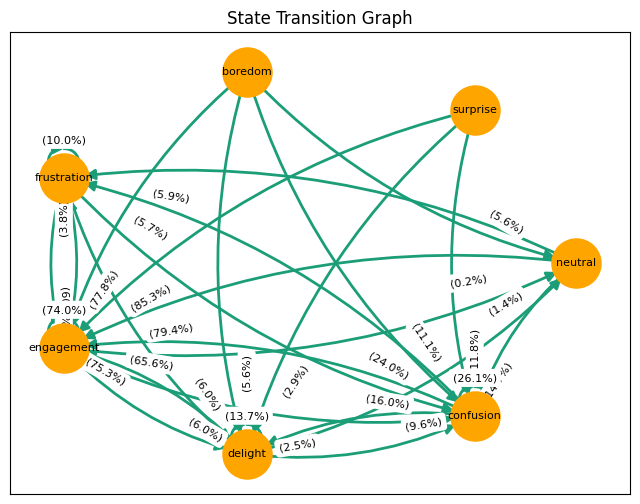

All edges (with attributes): [('neutral', 'engagement', 16, {'prob': 0.7837837837837838}), ('neutral', 'neutral', 17, {'prob': 0.21621621621621623}), ('surprise', 'delight', 18, {'prob': 0.02702702702702703}), ('surprise', 'engagement', 19, {'prob': 0.972972972972973}), ('boredom', 'engagement', 0, {'prob': 1.0}), ('frustration', 'confusion', 11, {'prob': 0.02127659574468085}), ('frustration', 'delight', 12, {'prob': 0.02127659574468085}), ('frustration', 'engagement', 13, {'prob': 0.5319148936170213}), ('frustration', 'frustration', 14, {'prob': 0.40425531914893614}), ('frustration', 'neutral', 15, {'prob': 0.02127659574468085}), ('engagement', 'confusion', 7, {'prob': 0.01809954751131222}), ('engagement', 'delight', 8, {'prob': 0.030165912518853696}), ('engagement', 'engagement', 9, {'prob': 0.9441930618401206}), ('engagement', 'frustration', 10, {'prob': 0.007541478129713424}), ('delight', 'delight', 5, {'prob': 0.4411764705882353}), ('delight', 'engagement', 6, {'prob': 0.558823529

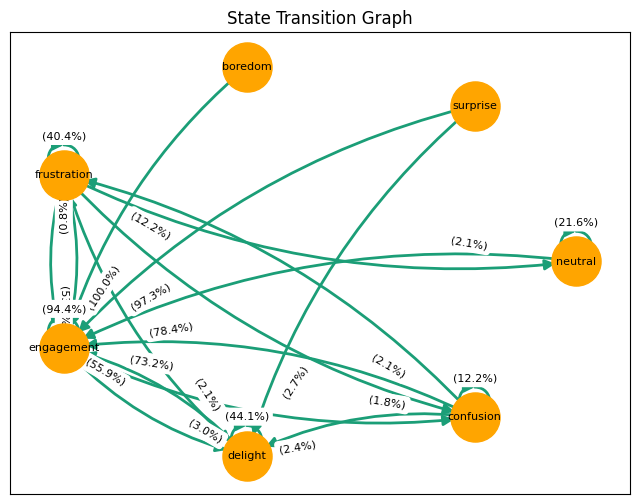

All edges (with attributes): [('neutral', 'confusion', 16, {'prob': 0.029411764705882353}), ('neutral', 'engagement', 17, {'prob': 0.5294117647058824}), ('neutral', 'neutral', 18, {'prob': 0.4411764705882353}), ('surprise', 'confusion', 19, {'prob': 0.13793103448275862}), ('surprise', 'engagement', 20, {'prob': 0.8620689655172413}), ('boredom', 'confusion', 0, {'prob': 0.06666666666666667}), ('boredom', 'engagement', 1, {'prob': 0.9333333333333333}), ('frustration', 'delight', 13, {'prob': 0.016666666666666666}), ('frustration', 'engagement', 14, {'prob': 0.5}), ('frustration', 'frustration', 15, {'prob': 0.48333333333333334}), ('engagement', 'confusion', 8, {'prob': 0.09059233449477352}), ('engagement', 'delight', 9, {'prob': 0.02613240418118467}), ('engagement', 'engagement', 10, {'prob': 0.8588850174216028}), ('engagement', 'frustration', 11, {'prob': 0.02264808362369338}), ('engagement', 'neutral', 12, {'prob': 0.0017421602787456446}), ('delight', 'confusion', 5, {'prob': 0.0133333

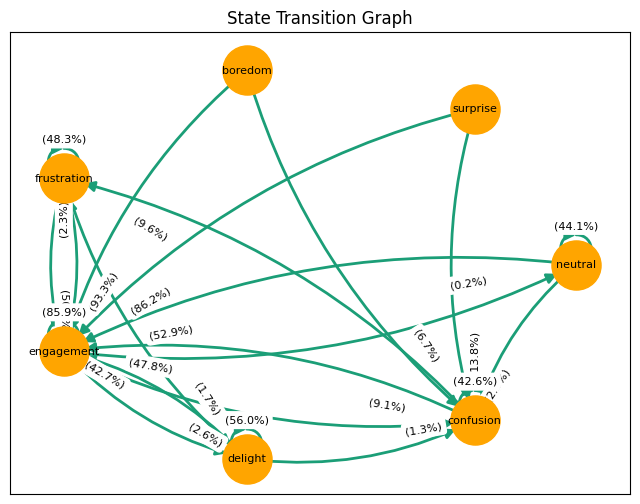

In [114]:
network_graph(prob_result11_false, "current_state", "next_state", "probability")
network_graph(prob_result21_false, "current_state", "next_state", "probability")
network_graph(prob_result31_false, "current_state", "next_state", "probability")